In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_final.csv', sep=';')
data_dict = pd.read_excel("Dictionnaire_final.xlsx")

In [3]:
# Display all columns
pd.set_option('display.max_colwidth', None)
data_dict

,NOM,DESCRIPTION
0,int_no,Intersection ID
1,x,latitude
2,y,longitude
3,rue_1,first street of the intersection
4,rue_2,second street of the intersection
5,street_1,first street of the intersection
6,street_2,second street of the intersection
7,date,date where safety measures where recorded
8,all_pedest,presence of all pedestrian phase (exclusive pedestrian phase)
9,pi,average annual daily flow for pedestrian at the intersection


In [4]:
# Drop superfluous columns
df = df.drop(columns=["Unnamed: 59", "Unnamed: 60"])
# Drop english columns
df = df.drop(columns=["street_1", "street_2"])

# Drop columns that are transformations of other columns
log_columns = [c for c in df.columns if c.startswith("ln_")]
divided_columns = ["traffic_10000", "ped_100"]
df = df.drop(columns=log_columns + divided_columns)

In [5]:
# Duplicates?
print(df["int_no"].value_counts().sort_values().tail(5))
df[df["int_no"] == 9151]

int_no
128     1
47      1
539     1
931     1
9151    2
Name: count, dtype: int64


,int_no,x,y,rue_1,rue_2,date_,all_pedest,pi,fi,fli,...,west_ped,total_lane,of_exclusi,any_exclus,commercial,curb_exten,all_red_an,new_half_r,distdt,borough
731,9151,297769.09375,5050923.5,Langelier,P,15/07/2009,0,894.321106,21885.785156,1797.271240,...,423.625793,4,0,0,7,0,0,0,10801.348633,St-LÚonard
756,9151,298515.93750,5049434.5,Jean-Talon,Mainville,21/09/2009,0,1124.394653,12923.561523,590.416504,...,371.228729,4,0,0,0,0,0,0,9239.489258,St-LÚonard


<Axes: >

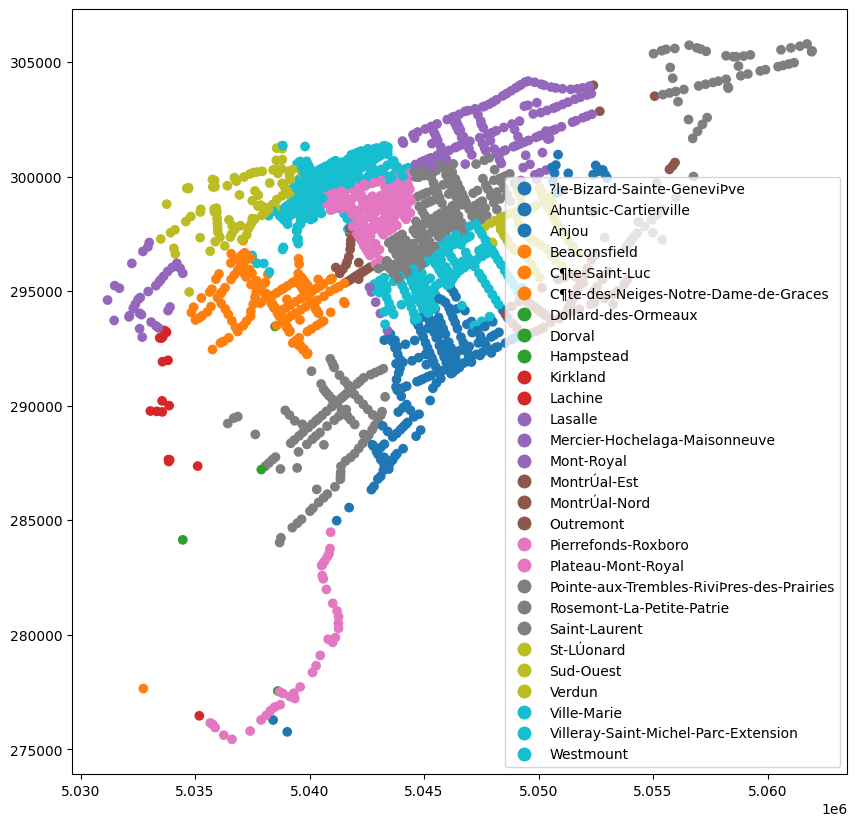

In [6]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.y, df.x))
gdf.plot(column="borough", legend=True, figsize=(10, 10))


# Create new features

<Axes: >

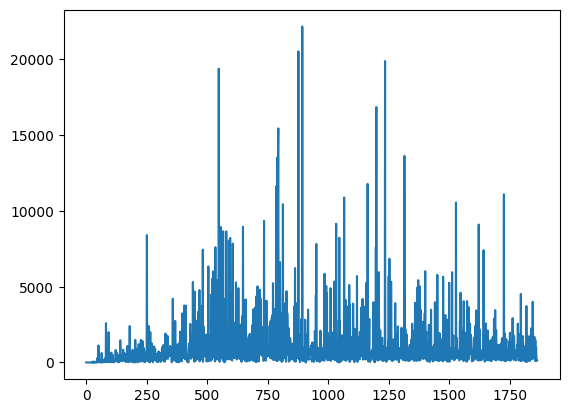

In [7]:
df["acc_rate"] = df["pi"] / (df["acc"] + 1)
df["acc_rate"].plot()

In [8]:
# Are there any intersections with more accidents than pietons
df.loc[df["acc"] > df["pi"]][["acc", "pi"]]

,acc,pi
16,1,0.0
19,1,0.0
23,1,0.0
32,2,0.0
35,1,0.0
41,2,0.0
44,4,0.0
61,3,0.0
67,6,0.0
422,6,0.0


In [9]:
df.sort_values("acc_rate")

,int_no,x,y,rue_1,rue_2,date_,all_pedest,pi,fi,fli,...,total_lane,of_exclusi,any_exclus,commercial,curb_exten,all_red_an,new_half_r,distdt,borough,acc_rate
0,40,296397.31250,5037515.0,Côte-Saint-Antoine,Hampton/Sherbrooke,27/02/2009,0,0.000000,2603.827881,0.000000,...,5,0,0,0,0,0,1,3932.076904,C¶te-des-Neiges-Notre-Dame-de-Graces,0.000000
907,898,297983.25000,5047231.5,Bélanger,Pie-IX,20/11/2008,0,0.000000,52277.988281,1346.342285,...,6,0,0,2,0,0,0,7120.476074,Villeray-Saint-Michel-Parc-Extension,0.000000
67,1351,297337.28125,5035224.5,Jolicoeur,Monk,08/11/2007,0,0.000000,13390.027344,2201.854492,...,2,0,0,0,0,0,0,5352.002930,Sud-Ouest,0.000000
422,865,299035.65625,5046765.0,Pie-IX,Rosemont,18/11/2008,0,0.000000,45604.160156,1339.508057,...,6,0,0,0,0,0,0,6544.184082,Rosemont-La-Petite-Patrie,0.000000
61,574,298872.75000,5042316.5,Duluth,Saint-Denis,22/10/2008,0,0.000000,30649.697266,519.134460,...,4,0,0,0,0,0,0,2125.667969,Plateau-Mont-Royal,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,365,299048.40625,5039935.5,Sainte-Catherine,Stanley,12/03/2009,0,33723.679688,14564.191406,1353.957520,...,2,0,0,0,0,0,0,350.373993,Ville-Marie,16861.839844
548,392,300083.40625,5040151.5,Saint-Jacques,Square Victoria Est,20/11/2008,1,19392.152344,13308.460938,4219.224121,...,3,0,0,0,1,1,0,839.242004,Ville-Marie,19392.152344
1235,342,299204.12500,5040161.0,Mansfield,Sainte-Catherine,13/03/2009,0,39793.917969,19339.615234,2854.811035,...,3,0,0,0,0,0,0,76.226997,Ville-Marie,19896.958984
877,347,298881.03125,5040309.5,McTavish,Metcalfe/Sherbrooke,06/10/2009,0,20534.464844,24600.123047,1900.237061,...,4,0,0,0,0,0,0,376.140991,Ville-Marie,20534.464844


In [10]:
df.to_csv("data_final_cleaned.csv", index=False)

# Target variable distribution

(array([1.316e+03, 3.350e+02, 1.160e+02, 5.700e+01, 2.500e+01, 6.000e+00,
        4.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <BarContainer object of 10 artists>)

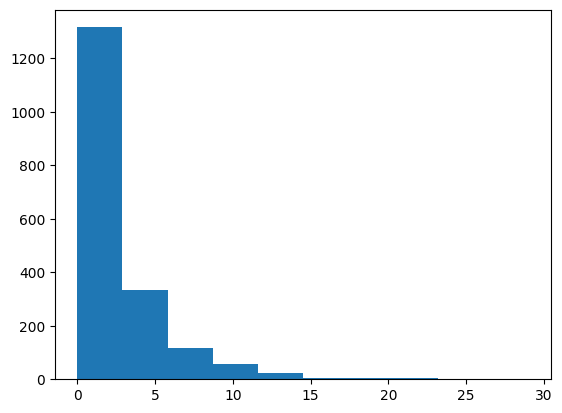

In [11]:
plt.hist(df["acc"])

(array([689.,   0., 380., 247., 258., 121.,  89.,  65.,  10.,   5.]),
 array([0.        , 0.34011974, 0.68023948, 1.02035921, 1.36047895,
        1.70059869, 2.04071843, 2.38083817, 2.72095791, 3.06107764,
        3.40119738]),
 <BarContainer object of 10 artists>)

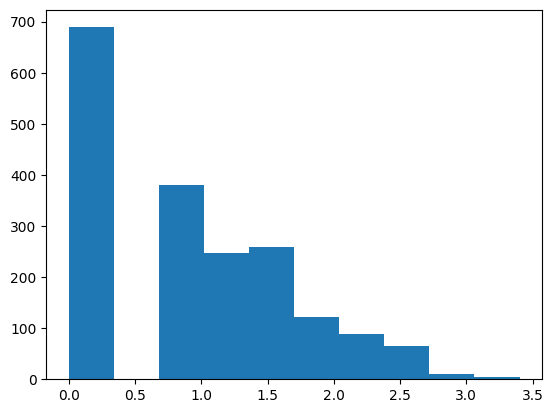

In [12]:
plt.hist(np.log1p(df["acc"]))